In [58]:
# Setup the basics, with the help of: https://realpython.com/beautiful-soup-web-scraper-python/ and https://www.analyticsvidhya.com/blog/2020/10/web-scraping-selenium-in-python/ and https://stackoverflow.com/questions/18674092/how-to-implement-chromedriver-in-selenium-in-linux-platform
# BeautifulSoup is not working, because the website is working with JS
# import requests
# from bs4 import BeautifulSoup

# URL = "https://dip.bundestag.de/erweiterte-suche?term=Verkehrswende&f.wahlperiode=13&f.wahlperiode=14&f.wahlperiode=15&f.wahlperiode=16&f.wahlperiode=17&f.wahlperiode=18&f.wahlperiode=19&f.typ=Dokument&f.vorgangstyp_p=01Anträge&f.vorgangstyp_p=01Anträge~Antrag&f.drucksachetyp_p=01Anträge&rows=25&sort=datum_auf"
# page = requests.get(URL)
# soup = BeautifulSoup(page.content, "html.parser")
# print(page.text)

The script is based on queries of the Bundestag archive website and centres on propositions that explicitly mention the "Verkehrswende". The following script downloads key information from initiatives by party members. The information is scraped from the public website and uses html classes of the search results as itentifiers. The script has to use a virtual browser as a proxy, because the website of the bundestag archive uses an interactive Javascript that requires emulation. As indicated above, a simple BeautifulSoup scraping does not work in this case.

In [6]:
# antraege = soup.find_all("li", class_="g8gv87-0 gdPFiB")

# for antrag in antraege:
#    titel = antraege.find_all("a", class_="g8gv87-1 iZTyhq")
#    print(titel.text)

In [1]:
from selenium import webdriver
import time
import pandas as pd

The Bundestag archive presents the results in multiple sites, the total of three have to be called separatedly.

In [14]:
FILE_PATH_FOLDER = '../Dokumente/antraege'
# 1: search_query = 'https://dip.bundestag.de/erweiterte-suche?term=Verkehrswende&f.wahlperiode=13&f.wahlperiode=14&f.wahlperiode=15&f.wahlperiode=16&f.wahlperiode=17&f.wahlperiode=18&f.wahlperiode=19&f.typ=Dokument&f.vorgangstyp_p=01Anträge&f.vorgangstyp_p=01Anträge~Antrag&f.drucksachetyp_p=01Anträge&rows=25&sort=datum_auf'
# 2: search_query = 'https://dip.bundestag.de/erweiterte-suche?term=Verkehrswende&f.wahlperiode=13&f.wahlperiode=14&f.wahlperiode=15&f.wahlperiode=16&f.wahlperiode=17&f.wahlperiode=18&f.wahlperiode=19&f.typ=Dokument&f.vorgangstyp_p=01Antr%C3%A4ge&f.vorgangstyp_p=01Antr%C3%A4ge~Antrag&f.drucksachetyp_p=01Antr%C3%A4ge&start=25&rows=25&sort=datum_auf'
# 3: search_query = 'https://dip.bundestag.de/erweiterte-suche?term=Verkehrswende&f.wahlperiode=13&f.wahlperiode=14&f.wahlperiode=15&f.wahlperiode=16&f.wahlperiode=17&f.wahlperiode=18&f.wahlperiode=19&f.typ=Dokument&f.vorgangstyp_p=01Antr%C3%A4ge&f.vorgangstyp_p=01Antr%C3%A4ge~Antrag&f.drucksachetyp_p=01Antr%C3%A4ge&start=50&rows=25&sort=datum_auf'

search_query = 'https://dip.bundestag.de/erweiterte-suche?term=Verkehrswende&f.wahlperiode=13&f.wahlperiode=14&f.wahlperiode=15&f.wahlperiode=16&f.wahlperiode=17&f.wahlperiode=18&f.wahlperiode=19&f.typ=Dokument&f.vorgangstyp_p=01Antr%C3%A4ge&f.vorgangstyp_p=01Antr%C3%A4ge~Antrag&f.drucksachetyp_p=01Antr%C3%A4ge&start=50&rows=25&sort=datum_auf'
driver = webdriver.Chrome(executable_path='/usr/local/bin/chromedriver')
web_details = []

driver.get(search_query)
time.sleep(5)

In [15]:
web_list = driver.find_elements_by_xpath("//section[@class='g8gv87-2 bYcAMv']") # ("//li[@class='g8gv87-0 gdPFiB']")

In [16]:
# Looking at html elemnts (detect information through the browser), data is stored in a list.
for each_item in web_list:
    title = each_item.find_elements_by_xpath(".//a[@class='g8gv87-1 iZTyhq']")[0]
    date = each_item.find_elements_by_xpath(".//span[@class='sc-1qu2ema-3 sc-1qu2ema-4 hwChjA lahLUS']")[0]
    period = each_item.find_elements_by_xpath(".//span[@class='sc-1qu2ema-5 kZuKMG']")[0]
    party = each_item.find_elements_by_xpath(".//div[@class='sc-1xaeas4-4 eUBlie']")[0]
    #document_url = each_item.find_elements_by_xpath(".//div[@class='sc-1xaeas4-0 iRzxWO']/a")[0]
    text = each_item.find_elements_by_xpath(".//div[@class='sc-1ufk5ml-0 RHbFi']")[0]

    info = [title.text, date.text, period.text, party.text, text.text] # document_url.text
    web_details.append(info)
driver.quit()
# print(web_details)

# Create DataFrames
Based on the queries, DataFrames are created, first for each data queried, then in concatenated form.

In [18]:
web_details_df = pd.DataFrame(web_details)
web_details_df.columns = ['title', 'date', 'period', 'party', 'text']

web_details_df.head()

,title,date,period,party,text
0,Investitionsoffensive in den öffentlichen Nahv...,15.09.2020,19. Wahlperiode,(Antrag Fraktion DIE LINKE),Investitionsoffensive in den öffentlichen Nahv...
1,"Weiterbau der A 49 stoppen, ÖPP-Verträge kündigen",15.09.2020,19. Wahlperiode,(Antrag Fraktion BÜNDNIS 90/DIE GRÜNEN),Der Deutsche Bundestag stellt fest: Um die Kli...
2,Parkraummanagement zu einem wirkungsvollen Han...,15.09.2020,19. Wahlperiode,(Antrag Fraktion BÜNDNIS 90/DIE GRÜNEN),"Julia Verlinden, Gerhard Zickenheiner und der ..."
3,"Bildung, Innovation und Digitalisierung - Zent...",15.09.2020,19. Wahlperiode,"(Antrag Fraktion der CDU/CSU, Fraktion der SPD)",Forschung bringt auch technologische und Sozia...
4,"Weiterbau der A 49 stoppen, ÖPP-Verträge kündi...",06.10.2020,19. Wahlperiode,(Antrag Fraktion DIE LINKE),Der Deutsche Bundestag stellt fest: Um die Kli...


In [20]:
# web_details_df_3 = web_details_df
# web_details_df_1
# web_details_df_2
# web_details_df_3

frames = [web_details_df_1, web_details_df_2, web_details_df_3]

web_details_df = pd.concat(frames)
web_details_df

,title,date,period,party,text
0,Investitionsprogramm für Arbeitsplätze durch K...,09.03.1995,13. Wahlperiode,(Antrag Fraktion BÜNDNIS 90/DIE GRÜNEN),Der Deutsche Bundestag fordert die Bundesregie...
1,Das Meer ist keine Müllhalde,20.06.1995,13. Wahlperiode,(Antrag Fraktion BÜNDNIS 90/DIE GRÜNEN),Wahlperiode Drucksache 13/1727 schen Stoffgrup...
2,Verkehrsplanung Hauptstadt Berlin und Region B...,12.10.1995,13. Wahlperiode,(Antrag Gruppe der PDS),Kfz-verkehrsberuhigt wurde lediglich eine „Ins...
3,Das Meer ist keine Müllhalde,05.12.1995,13. Wahlperiode,(Antrag Fraktion BÜNDNIS 90/DIE GRÜNEN),Der weitere Ein- trag von Chlorparaffinen in d...
4,Einstieg in eine ökologisch-soziale Steuerreform,22.01.1996,13. Wahlperiode,(Antrag Fraktion BÜNDNIS 90/DIE GRÜNEN),Deshalb wird in den ersten Jahren ein nicht un...
...,...,...,...,...,...
10,Die deutsche Bahnpolitik in eine europäische V...,13.04.2021,19. Wahlperiode,(Antrag Fraktion BÜNDNIS 90/DIE GRÜNEN),"Julia Verlinden, Gerhard Zickenheiner und der ..."
11,"Kein ""weiter so"" mit dem Bundesverkehrswegepla...",20.04.2021,19. Wahlperiode,(Antrag Fraktion DIE LINKE),Dies bedeutet eine massive Umverteilung der Mi...
12,Klimaschutz ist jetzt,05.05.2021,19. Wahlperiode,(Antrag Fraktion BÜNDNIS 90/DIE GRÜNEN),Wahlperiode 16. eine leistungsfähige Bahn zum ...
13,Einfach frei leben - Kein deutsches Engagement...,17.05.2021,19. Wahlperiode,(Antrag Fraktion der AfD),Statt eines technologieoffenen Ansatzes setzt ...


In [26]:
web_details_df['verkehrswende_count'] = web_details_df['text'].str.count('Verkehrswende')

In [30]:
web_details_df.sort_values(by='verkehrswende_count', ascending=False)

,title,date,period,party,text,verkehrswende_count
2,Verkehrsplanung Hauptstadt Berlin und Region B...,12.10.1995,13. Wahlperiode,(Antrag Gruppe der PDS),Kfz-verkehrsberuhigt wurde lediglich eine „Ins...,5
3,Luft- und Lebensqualität schaffen - Automobilh...,19.09.2018,19. Wahlperiode,(Antrag Fraktion BÜNDNIS 90/DIE GRÜNEN),Julia Verlinden und der Fraktion BÜNDNIS 90/DI...,5
4,Einstieg in eine ökologisch-soziale Steuerreform,22.01.1996,13. Wahlperiode,(Antrag Fraktion BÜNDNIS 90/DIE GRÜNEN),Deshalb wird in den ersten Jahren ein nicht un...,4
0,Investitionsprogramm für Arbeitsplätze durch K...,09.03.1995,13. Wahlperiode,(Antrag Fraktion BÜNDNIS 90/DIE GRÜNEN),Der Deutsche Bundestag fordert die Bundesregie...,3
19,Gesellschaftliche Debatte zu den Energiepreise...,08.11.2000,14. Wahlperiode,(Antrag Fraktion der PDS),Für den Verkehrsmarkt als Ganzes liefert die S...,3
...,...,...,...,...,...,...
10,Mehr Wettbewerb und Mittelstand für Europa - E...,08.05.2019,19. Wahlperiode,(Antrag Fraktion der FDP),Wahlperiode ii. im Bereich der öffentlichen Au...,1
11,Maßnahmen für mehr Klimaschutz im internationa...,15.05.2019,19. Wahlperiode,(Antrag Fraktion BÜNDNIS 90/DIE GRÜNEN),"US-Karibik (Schwefel, Stickoxide, Partikel/Fei...",1
12,Gute Schienenwege braucht das Land - Erhaltung...,05.06.2019,19. Wahlperiode,(Antrag Fraktion BÜNDNIS 90/DIE GRÜNEN),"Um die Klimaziele von Paris zu erreichen, müss...",1
10,Sozial- und umweltverträgliche Mobilität - ein...,22.05.1996,13. Wahlperiode,(Antrag Fraktion BÜNDNIS 90/DIE GRÜNEN),Die Techni- ken für den Umbau des Verkehrssyst...,1


In [36]:
web_details_df.to_csv('../Dokumente/antraege/antraege.csv', index=True)

# Visualisierung

In [25]:
import pandas as pd
import plotly.express as px

In [57]:
df = pd.read_csv('../Dokumente/antraege/antraege.csv', parse_dates=['date'])
df['date'] = pd.to_datetime(df['date'])

In [59]:
df.drop(df.filter(regex="Unname"),axis=1, inplace=True)

In [52]:
df = df.set_index(['date'])

In [60]:
df

,title,date,period,party,text,verkehrswende_count
0,Investitionsprogramm für Arbeitsplätze durch K...,1995-09-03,13. Wahlperiode,(Antrag Fraktion BÜNDNIS 90/DIE GRÜNEN),Der Deutsche Bundestag fordert die Bundesregie...,3
1,Das Meer ist keine Müllhalde,1995-06-20,13. Wahlperiode,(Antrag Fraktion BÜNDNIS 90/DIE GRÜNEN),Wahlperiode Drucksache 13/1727 schen Stoffgrup...,1
2,Verkehrsplanung Hauptstadt Berlin und Region B...,1995-12-10,13. Wahlperiode,(Antrag Gruppe der PDS),Kfz-verkehrsberuhigt wurde lediglich eine „Ins...,5
3,Das Meer ist keine Müllhalde,1995-05-12,13. Wahlperiode,(Antrag Fraktion BÜNDNIS 90/DIE GRÜNEN),Der weitere Ein- trag von Chlorparaffinen in d...,1
4,Einstieg in eine ökologisch-soziale Steuerreform,1996-01-22,13. Wahlperiode,(Antrag Fraktion BÜNDNIS 90/DIE GRÜNEN),Deshalb wird in den ersten Jahren ein nicht un...,4
...,...,...,...,...,...,...
60,Die deutsche Bahnpolitik in eine europäische V...,2021-04-13,19. Wahlperiode,(Antrag Fraktion BÜNDNIS 90/DIE GRÜNEN),"Julia Verlinden, Gerhard Zickenheiner und der ...",3
61,"Kein ""weiter so"" mit dem Bundesverkehrswegepla...",2021-04-20,19. Wahlperiode,(Antrag Fraktion DIE LINKE),Dies bedeutet eine massive Umverteilung der Mi...,1
62,Klimaschutz ist jetzt,2021-05-05,19. Wahlperiode,(Antrag Fraktion BÜNDNIS 90/DIE GRÜNEN),Wahlperiode 16. eine leistungsfähige Bahn zum ...,1
63,Einfach frei leben - Kein deutsches Engagement...,2021-05-17,19. Wahlperiode,(Antrag Fraktion der AfD),Statt eines technologieoffenen Ansatzes setzt ...,1


The following code creates simple graphs (time series and bar charts) to highlight the contributions to the topic by time and party. We learn: the Verkehrswende used to be merely a topic of the left, and it was scacely mobility in Anträgen. Only recently it has been put to action and adopted by other actors.

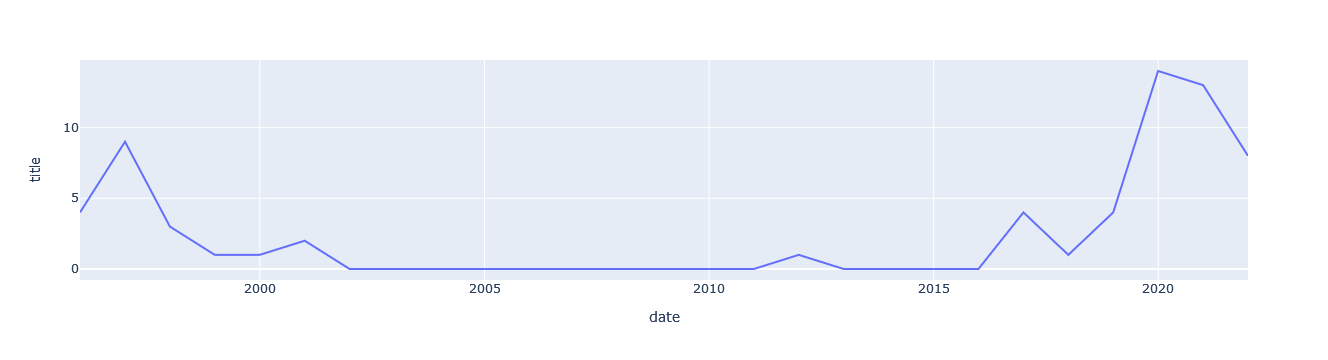

In [80]:
df_count = df[['date', 'title']].groupby(pd.Grouper(key='date', freq='1Y')).count() #.sort_values(by='date', ascending=True)['title']
fig = px.line(df_count, y="title")
fig.show()

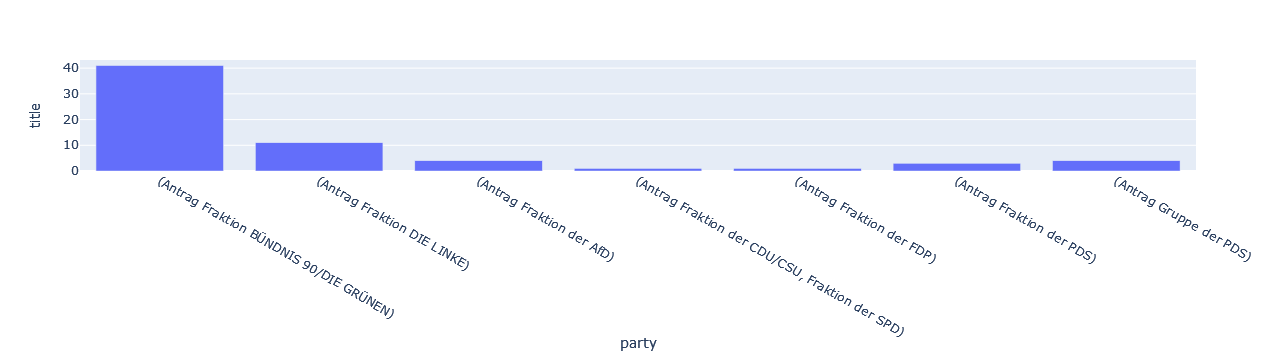

In [79]:
df_party = df[['party', 'title']].groupby(pd.Grouper(key='party')).count().sort_values(by='party', ascending=True)
fig = px.bar(df_party, y="title")
fig.show()

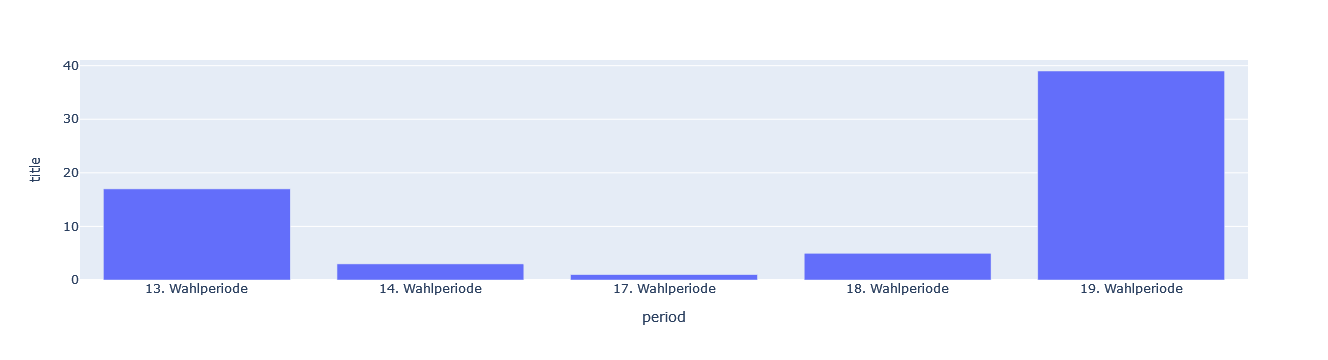

In [82]:
df_party = df[['period', 'title']].groupby(pd.Grouper(key='period')).count().sort_values(by='period', ascending=True)
fig = px.bar(df_party, y="title")
fig.show()